In [1]:
import re
import glob
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
from common import *

In [2]:
chromosome = 10
alphas = [75, 108]

In [3]:
gammas = get_gammas(chromosome, alphas)
gammas

{75: [50,
  55,
  60,
  65,
  70,
  75,
  80,
  85,
  90,
  95,
  100,
  105,
  110,
  115,
  120,
  125,
  130,
  135,
  140,
  145,
  150,
  155,
  160,
  165,
  170,
  175,
  180,
  185,
  190,
  195,
  200],
 108: [50,
  55,
  60,
  65,
  70,
  75,
  80,
  85,
  90,
  95,
  100,
  105,
  110,
  115,
  120,
  125,
  130,
  135]}

In [4]:
data = []

for alpha in alphas:

    modularity = pd.read_csv(f"matlab/output/A1_chr{chromosome}_alpha{alpha}_modularity.csv", sep=" ", header=None).T

    for gamma_idx, gamma in enumerate(gammas[alpha]):
        df = pd.read_csv(f"matlab/output/A1_chr{chromosome}_gamma{gamma}_alpha{alpha}_partitions.csv", sep=" ", header=None)
        df = df.apply(lambda x: x.value_counts())
        df = df.apply(lambda x: effective_size(x[~np.isnan(x)]), raw=True)
        eff_size = df.mean() / 10

        files = glob.glob(f"output/A1_chr{chromosome}_gamma{gamma}_alpha{alpha}_cluster*.csv")

        for file in files:
            cluster = int(file.split("cluster", maxsplit=1)[1].split(".")[0])
            q = modularity[gamma_idx].iloc[cluster]

            df = pd.read_csv(file, sep=" ", header=None)
            size = len(df.columns)

            data.append({
                "$\\alpha$": str(alpha / 100),
                "$\gamma$": gamma / 100,
                "eff. community size (Mb)": eff_size,
                "cluster size": size,
                "cluster": cluster,
                "$Q$": q,
                "$Q/Q_{max}$": q / modularity[gamma_idx].max(),
            })

df = pd.DataFrame(data)

In [5]:
df

,$\alpha$,$\gamma$,eff. community size (Mb),cluster size,cluster,$Q$,$Q/Q_{max}$
0,0.75,1.15,1.821570,104,0,0.341493,1.000000
1,0.75,1.15,1.821570,114,1,0.341484,0.999974
2,0.75,1.20,1.651773,201,0,0.332329,1.000000
3,0.75,1.25,1.495420,102,7,0.323566,0.999807
4,0.75,1.25,1.495420,245,1,0.323590,0.999883
5,0.75,1.30,1.346317,431,0,0.315292,1.000000
6,0.75,1.35,1.210309,107,1,0.307385,0.999957
7,0.75,1.35,1.210309,327,0,0.307399,1.000000
8,0.75,1.35,1.210309,114,3,0.307375,0.999923
9,0.75,1.40,1.113270,734,0,0.300118,1.000000


[]

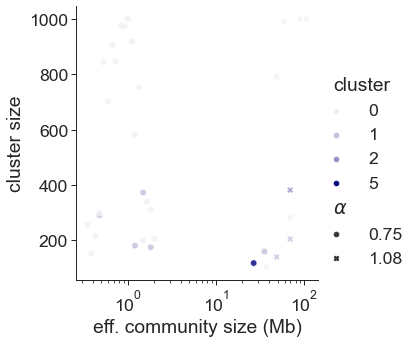

In [81]:
sns.set_style("ticks")
sns.set_context("paper", font_scale=2)
palette = sns.light_palette("navy", reverse=False, as_cmap=True)
#palette = sns.color_palette("Blues_r", as_cmap=True)

sns.relplot(df, x="eff. community size (Mb)", y="cluster size", style="$\\alpha$", hue="cluster", s=40, palette=palette, alpha=0.8)

#plt.ylim([100, 1100])
plt.semilogx()
#plt.semilogy()

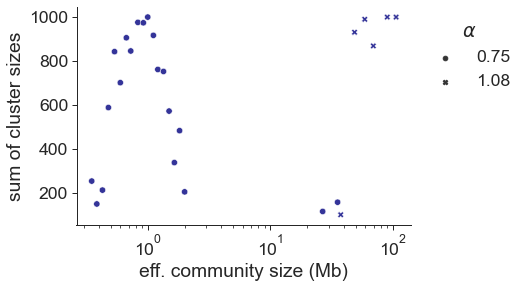

In [92]:
df_sum = df.groupby(["$\\alpha$", "eff. community size (Mb)"])["cluster size"].sum().reset_index()
ax = sns.scatterplot(df_sum, x="eff. community size (Mb)", y="cluster size", style="$\\alpha$", s=40, color=palette(200))
sns.despine()
plt.semilogx()
plt.ylabel("sum of cluster sizes")
sns.move_legend(ax, "upper left", frameon=False, bbox_to_anchor=(1, 1))
#plt.tight_layout()
plt.savefig("results/cluster_sizes.png", dpi=600, bbox_inches="tight")